In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bengali Fake News Classification
```
    আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।
    
```

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
auth = pd.read_csv("/content/drive/MyDrive/SPL3/Authentic-48K.csv")
fake = pd.read_csv("/content/drive/MyDrive/SPL3/Fake-1K.csv")

In [5]:
auth.head()

articleID          domain                 date   category  \
0          1  jagonews24.com  2018-09-19 17:48:18  Education   
1          2  jagonews24.com  2018-09-19 17:48:19   National   
2          3  jagonews24.com  2018-09-19 17:48:20   National   
3          4  jagonews24.com  2018-09-19 17:48:21      Crime   
4          5  jagonews24.com  2018-09-19 17:48:21   National   

                                            headline  \
0   হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ   
1    মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ   
2  প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...   
3  মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...   
4         টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু   

                                             content  label  
0  গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...      1  
1  বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...      1  
2  নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...      1  
3  সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...      1  
4  মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...      1

In [6]:
fake.head()

articleID                    domain                        date  \
0          1         channeldhaka.news   2019-03-14T13:34:14+00:00   
1          2                 earki.com            সেম্বর ১৭, ২০১৮    
2          3                 earki.com  ২০:৩৯, জানুয়ারি ১৪, ২০১৯    
3          4         channeldhaka.news   2018-06-30T15:56:47+00:00   
4          5  motikontho.wordpress.com   2013-03-05T21:55:45+00:00   

        category    source                                           headline  \
0  International  Reporter                           মুরগির হামলায় শেয়াল নিহত   
1  Miscellaneous  Reporter            বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম   
2  Miscellaneous  Reporter  বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...   
3         Sports  Reporter                      অবসর নেয়ার ঘোষণা দিলেন মেসি !   
4  Miscellaneous  Reporter               মাদারফাকার নহে, ব্রাদারফাকার: সাকা |   

                                             content  label  
0  বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...      0  
1  BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...      0  
2  অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...      0  
3  রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...      0  
4  নিজস্ব ‘ নহে, আমি ব্রাদারফাকার।’বলেছেন বৃহত্তর...      0

# EDA

In [7]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

### Compare Headline Length and Content Length

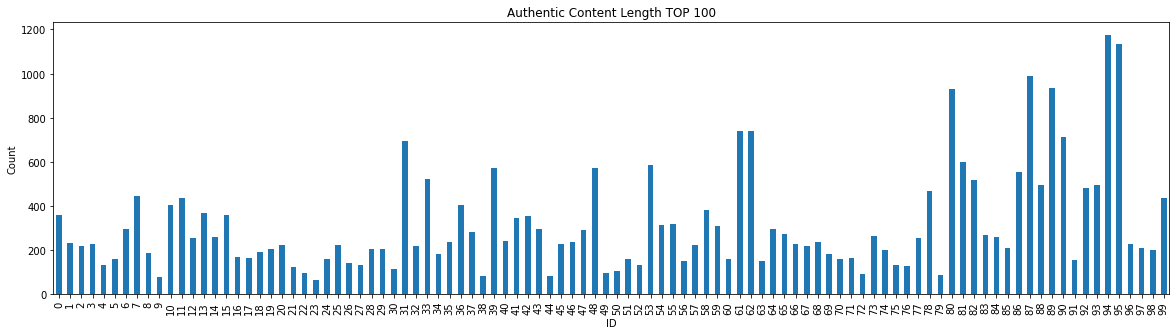

In [8]:
auth['head_lenght'] = auth.headline.apply(lambda x : len(x.split()))
auth['content_head_lenght'] = auth.content.apply(lambda x : len(x.split()))


show_bar(auth.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(auth.content_head_lenght, "Authentic Content Length TOP 100")

In [9]:
show_dist(auth.head_lenght)
print("")
show_dist(auth.content_head_lenght)

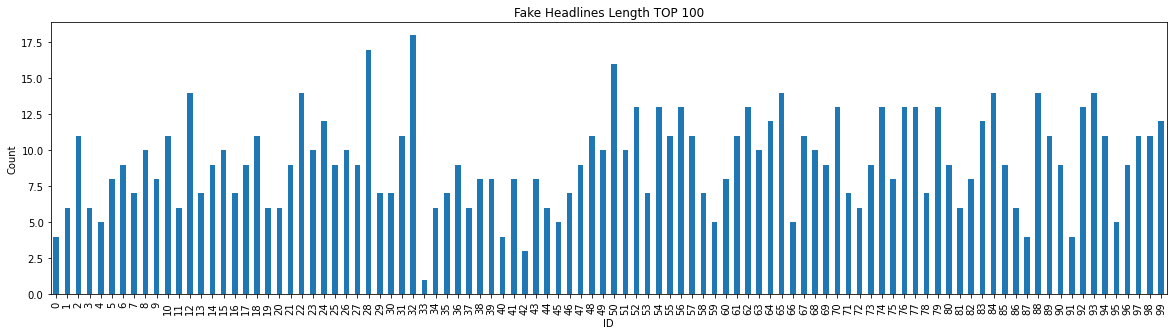

In [10]:
fake['head_lenght'] = fake.headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

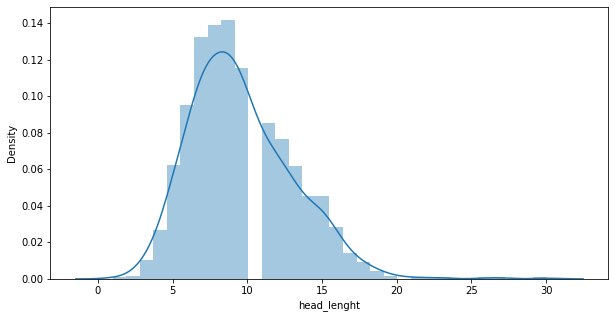

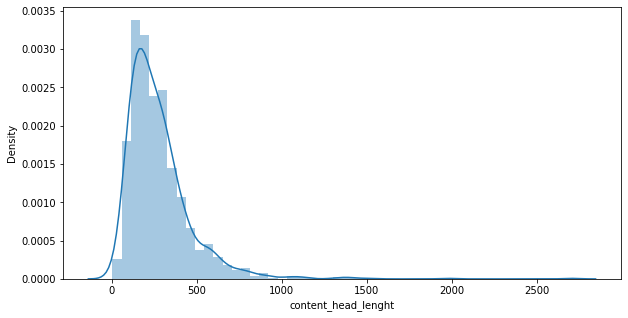

In [11]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

## Word Cloud

In [12]:
# !wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

In [13]:
# !unzip 06-nikosh-bangla-font.zip

In [14]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='black', 
                    font_path="/content/drive/MyDrive/SPL3/save_file/Nikosh.ttf",
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [ ]:
#s= " ".join(auth.headline[:100])
#plot_world(s)

In [ ]:
#s= " ".join(fake.headline[:100])
#plot_world(s)

# Analysis Words

In [17]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.3 MB/s 
     |████████████████████████████████| 1.3 MB 58.2 MB/s 
     |████████████████████████████████| 1.0 MB 67.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [18]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


In [19]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [20]:
auth_corpus = create_corpus(auth.headline[:1200])
print("Total auth tokens in 1000", len(auth_corpus))

fake_corpus = create_corpus(fake.headline[:1200])
print("Total auth tokens in 1000", len(fake_corpus))

Total auth tokens in 1000 8907
Total auth tokens in 1000 12544


In [21]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("/content/drive/MyDrive/SPL3/save_file/Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [22]:
from collections import defaultdict
from collections import  Counter
from bnlp.corpus import stopwords
import matplotlib.font_manager as fm

def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stopwords:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

('না', 'ও', 'হবে', 'থেকে', 'শুরু', 'জন্য', 'নিয়ে', 'করে', 'কোটি', 'দুই', 'সঙ্গে', 'নতুন', 'করতে', 'করা', 'হচ্ছে', 'কাজ', 'করছে', 'হাজার', 'নেই', 'প্রথম')
(70, 41, 29, 28, 26, 26, 25, 25, 23, 22, 20, 19, 19, 18, 18, 16, 15, 14, 13, 13)


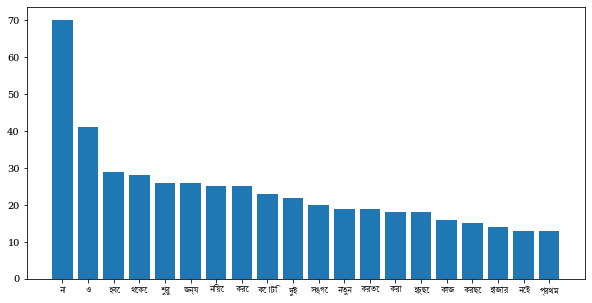

In [23]:
show_stop_words(auth_corpus)

('না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'করতে', 'কি', 'দিলেন', 'যা', 'এবার', 'করা', 'করলেন', 'পর', 'হবে', 'বেশি', 'দুই', 'আমার')
(122, 72, 63, 44, 43, 42, 39, 32, 32, 32, 31, 30, 29, 29, 27, 26, 25, 24, 24, 23)


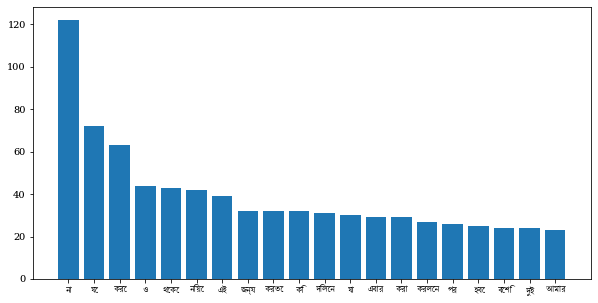

In [24]:
show_stop_words(fake_corpus)

In [25]:
from bnlp.corpus import stopwords, punctuations, digits

print(digits)
def filters(corpus):
  res = []
  for i in corpus:
    if i in stopwords:
      continue

    if i in punctuations + '‘' + '’':
      continue

    if i in digits:
      continue

    res.append(i)

  return res

০১২৩৪৫৬৭৮৯


In [26]:
auth_corpus_filtered = filters(auth_corpus)
fake_corpus_filtered = filters(fake_corpus)

In [27]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [28]:
x, y = get_top_words(auth_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('১৯', 'সেপ্টেম্বর', '২০১৮', 'প্রধানমন্ত্রী', 'পাকিস্তান', 'লাখ', 'আটক', 'বাংলাদেশ', 'ভারত', 'বিএনপি')
(63, 59, 57, 55, 37, 26, 26, 25, 25, 24)


In [29]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 10 words")
print(x)
print(y)

Top 10 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'এক', 'হয়ে', 'কারণে', 'সাথে', 'দিয়ে', 'যেভাবে', 'টাকা', '১০টি', 'শেখ', 'আসছে', 'বিয়ে', 'ফেসবুক', 'ছবি', 'ঢাকা', 'হিরো', 'ভিডিও', 'বিশ্বের', 'হাসিনা', 'হিসেবে', 'আলম', 'বন্ধ', 'সালমান', 'সেরা', 'করলো', 'ছেলেরা', 'সময়', 'কথা', 'সময়', '১০', 'বাংলাদেশ', 'যেসব', 'গেলেন', 'প্রধানমন্ত্রী', 'জেনে', 'বরিশালের', 'খেয়ে', 'আবুল', 'বাংলাদেশি', 'আটক', 'গেলো', 'মেয়েরা', 'দাবি', 'এলো', 'নির্বাচন', 'ছেলে', 'নোয়াখালীর', 'বাবা', 'গান', 'ভর্তি', 'মাহফুজুর', 'বাজারে', 'হুমকি', 'খান', 'ফেরত', '৫টি', 'রহমান', 'বাংলাদেশের', 'প্রশ্ন', 'নিন', 'মিরপুরের', 'যুবক', 'যাত্রী', 'নিষিদ্ধ', 'দল', 'যুবকের', 'পাওয়া', 'রাতে', 'থাকলে', 'দিলো', 'বিয়ের', 'প্রেমিকা', 'নাম', 'দ্বিতীয়', 'জানলে', 'যাবেন', 'অফ', 'সংঘর্ষ', 'বাংলা', 'খালেদা', 'মনোনয়ন', 'ঘোষণা', 'বড়', 'হওয়ায়', 'ঈদ', 'মেস', 'লুকিয়ে', 'অভিযোগ', 'বিএনপি', 'ফোন', 'শীর্ষে', 'সাক্ষাৎকারে', 'মিয়া', 'আবেদন', 'গরমে', 'দেশে', 'দেশ', 'গল্প', 'হাতে', 'নেতা', 'সম্পর্ক', 'ঢাকার', 'বাবুনগরী', 'বিরুদ্ধে', 'নোয়াখালীর', 'সম্পর্কে

# Classify News

In [30]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 7.6 MB/s 
     |████████████████████████████████| 7.6 MB 46.4 MB/s 
     |████████████████████████████████| 182 kB 64.2 MB/s 


In [31]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

In [32]:
# pip install transformers

# Prepare Datasets
- Dataset Info: Datasets contain `48678` authentic news and `1299` fake news. For this experiment, instead of all authentic news, only 5 times of fake news was used.
- And only consider the first 100 words (including headline and content)

- On datasets: Both headline and content of news were used. And manually a separator was added also `[SEP]`.

> BERT model is designed in such a way that the sentence has to start with the [CLS] token and end with the [SEP] token.
If we want to make separation of two sentences we can use [SEP] between sentences

### Train and Test split: 
(only 20% data used for testing)
- Total Dataset size: 10392
- Total train size: 8313
- Test train size: 2079

In [33]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=200):
        self.data = data
        
        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [34]:
auth = pd.read_csv("/content/drive/MyDrive/SPL3/Authentic-48K.csv")
fake = pd.read_csv("/content/drive/MyDrive/SPL3/Fake-1K.csv")

df = auth[:fake.shape[0]* 7]
df = df.append(fake)
df = df.sample(frac=1).reset_index(drop=True)
len(df)

10472

In [35]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits

btokenizer = BasicTokenizer()

def clean_text(text):
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
    
        filtered.append(i)
    
    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['content']
print(text)
print("\n********** After ***************")
print(clean_text(text))

********** Before ***************
অংশীদারিত্বমূলক সম্পর্ক আরও সুদৃঢ় এবং রোহিঙ্গা সমস্যা মোকাবেলায় কীভাবে সহযোগিতা করা যায়-এ নিয়ে আলোচনা করতে বিশ্বব্যাংকের দক্ষিণ এশীয় অঞ্চলের ভাইস প্রেসিডেন্ট হার্টইউং স্ক্যাফার আজ রবিবার ঢাকায় আসছেন। সফরকালে তিনি কক্সবাজারে রোহিঙ্গা ক্যাম্প পরিদর্শন এবং সেখানকার স্থানীয় সরকারি কর্মকর্তা, নাগরিক সমাজ ও বেসরকারি সেবামূলক প্রতিষ্ঠানের প্রতিনিধিদের সঙ্গে দেখা করবেন। এছাড়াও তিনি ঢাকায় অর্থমন্ত্রী আবুল মাল আবদুল মুহিত, পরিবেশ, বন ও জলবায়ু পরিবর্তন বিষয়ক মন্ত্রী ব্যারিস্টার আনিসুল ইসলাম মাহমুদসহ সরকারের জ্যেষ্ঠ কর্মকর্তা এবং বেসরকারি ও নাগরিক সমাজের প্রতিনিধিদের সঙ্গে বৈঠক করবেন। রোহিঙ্গা সমস্যা মোকাবেলায় বিশ্বব্যাংক বাংলাদেশকে ৪০ কোটি মার্কিন ডলারের অনুদান সহায়তা দিয়েছে। চলতি বছরের ১ জুলাই দক্ষিণ এশীয় অঞ্চলের ভাইস প্রেসিডেন্ট হিসেবে দায়িত্ব নেওয়ার পর এটি স্ক্যাফারের প্রথম বাংলাদেশ সফর। (ঢাকাটাইমস/২৩সেপ্টেম্বর/জেবি)

********** After ***************
অংশীদারিত্বমূলক সম্পর্ক সুদৃঢ় রোহিঙ্গা সমস্যা মোকাবেলায় কীভাবে সহযোগিতা যায় আলোচনা বিশ্বব্যাংকের দক্ষিণ এশীয় অঞ

In [36]:
df['head'] = df.headline.apply(clean_text)
df['con'] = df.content.apply(clean_text)

In [37]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.25, random_state=121, stratify=df['label'])

In [38]:
len(train_df), len(test_df)

(7854, 2618)

In [39]:
training_data = NewsDatasets(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [40]:
test_data = NewsDatasets(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

# Model
 
 
For this experiment, I used [Bangla Bert](https://huggingface.co/sagorsarker/bangla-bert-base) pretrained model.




In [41]:
class NewsBert(nn.Module):

    def __init__(self, bert):
        super(NewsBert, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 128)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(128, 2)  

    # define the forward pass
    def forward(self, input_ids, token_type_ids, attention_mask):
        # pass the inputs to the model
        out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        x = self.fc1(out[1])
        x = self.relu(x)
        # output layer
        x = self.fc2(self.dropout(x))
        
        return x

In [42]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/660M [00:00<?, ?B/s]

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

In [43]:
# for param in bert.parameters():
#     param.requires_grad = False

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsBert(bert)
model.to(device)

NewsBert(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

In [45]:
# s = "আমি বাংলায় গান গাই। [SEP]"
# t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
# print(t)
# out = model(**t)
# print(out)

In [46]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

# Train

In [47]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [48]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [49]:
epochs = 5
tokenizer_config = {
    "max_length": 200,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [50]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]
    
    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)
    
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "/content/drive/MyDrive/SPL3/save_file/news_model1.pth")


    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/5


  0%|          | 0/491 [00:00<?, ?it/s]

	Train loss:0.384816.. 	Valid Loss:0.352456.. 	Accuracy: 86.9366
Epoch: 2/5


  0%|          | 0/491 [00:00<?, ?it/s]

	Train loss:0.383894.. 	Valid Loss:0.380166.. 	Accuracy: 87.5095
Epoch: 3/5


  0%|          | 0/491 [00:00<?, ?it/s]

	Train loss:0.368427.. 	Valid Loss:0.349425.. 	Accuracy: 86.9748
Epoch: 4/5


  0%|          | 0/491 [00:00<?, ?it/s]

	Train loss:0.346450.. 	Valid Loss:0.352171.. 	Accuracy: 86.9748
Epoch: 5/5


  0%|          | 0/491 [00:00<?, ?it/s]

	Train loss:0.349992.. 	Valid Loss:0.351198.. 	Accuracy: 86.9748
Training completed in 33m 13s


In [51]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)

# Testing


In [52]:
model.load_state_dict(torch.load("/content/drive/MyDrive/SPL3/news_model1_30_11_1.36.pth", map_location = device))

<All keys matched successfully>

In [53]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    print(text)
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    # move things to model
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

('ক্যাটরিনার প্রেমে পড়েছেন আমির ২২ সেপ্টেম্বর ২০১৮ ১৩ ০২[SEP]প্রযোজনা প্রতিষ্ঠান যশরাজ ফিল্মসের ব্যানারে নির্মিত থাগস অব হিন্দোস্থান সিনেমার প্রধান চরিত্রে অভিনয় মি পারফেক্টনিস্ট খ্যাত বলিউড অভিনেতা আমির খান সহশিল্পী হিসেবে দঙ্গল কন্যা খ্যাত অভিনেত্রী ফতিমা সানা শেখ আমির খানের ধুম থ্রি মিসেনমার নায়িকা ক্যাটরিনা কাইফ এছাড়াও আছেন বলিউড শাহেনশাহ অমিতাভ বচ্চন ছবির সুরাইয়া জান ওরফে ক্যাটরিনার লুক প্রকাশ হয়েছে গর্জিয়াস লেহেঙ্গা নাকে নথ হাতে মেহেদি আদাবের ভঙ্গিতে দাঁড়িয়ে আছেন ক্যাট থাগস অব হিন্দোস্থান ছবিতে ক্যাটরিনা কাইফের লুক ক্যাটরিনা কাইফের রূপ আমির খান উচ্ছ্বসিত ট্যুইটার হ্যান্ডেলে লিখেছেন সুন্দরী প্রেমে পড়তেই থাগস অফ হিন্দুস্থান সিনেমাটির প্রযোজক আদিত্য চোপড়া ছবিটি পরিচালনা বিজয় কৃষ্ণ আচার্য ছবির কলাকুশলীরা প্রত্যাশা আঠারো শতকের ঠগসদের জীবন কাহিনী নির্মিত ঐতিহাসিক ছবি চমকে দেবে বলিউডের দর্শকদের ছবিটি ৭ নভেম্বর মুক্তি পাওয়ার কথা রয়েছে বিডি২৪লাইভ টিএএফ', 'ডোমিনোজের চিকেন ডমিনেটর পিজ্জার গায়ে সাঈদীর ছবি Bengal Beats[SEP]গতকাল ২৮ ফেব্রুয়ারী আমেরিকান পিজ্জা রেস্টুরেন্ট চেইন ডোমিনোজ পিজ্জার ব

In [54]:
from sklearn.metrics import classification_report

# preds = np.argmax(preds, axis = 1)
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.68      0.93      0.78       327
           1       0.99      0.94      0.96      2291

    accuracy                           0.94      2618
   macro avg       0.83      0.93      0.87      2618
weighted avg       0.95      0.94      0.94      2618



In [55]:
heading = 'রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স্ত্রী হার্ট অ্যাটাক করলেন - Bengal Beats'
content = 'রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাসানুল নান্না নামক ব্যক্তির হাঁচির আওয়াজে তার স্ত্রী হার্ট অ্যাটাক করে আশংকাজনক অবস্থায় হাসপাতালে ভর্তি। ঘটনার পর ঐ ব্যক্তিকে পুলিশ এসে রোল দিয়ে বাড়ি মারতে মারতে থানায় নিয়ে গিয়েছে। তবে পুলিশ আপাতত স্কচটেপ ও গামছা দিয়ে উনার মুখ বেঁধে রেখেছেন।প্রতিবেশীদের একজন ডিএসএলার দিয়ে ভালো ছবি তুলে দেয়ার শর্তে বলেন- “এই ব্যাটার হাঁচির আওয়াজে বাসায় থাকা দায় হয়ে গেসিলো। সারাক্ষণ আতংকে থাকা লাগতো কখন হাঁচির আওয়াজে বাড়ি ঘর না ভেঙে পড়ে। আর ভাই হাঁচি মানে শুধু হাঁচি না, পুরাই ভুমিকম্প। কত রাত যে নির্ঘুম কাটসে এই ব্যাটার জন্য, কাপাকাপিতে ঘুম ভাইঙ্গা গেসে ভুমিকম্পের ভয়ে টেবিলের উপর উঠার পর বুঝতে পারসি এই নান্না মিয়া হাঁচি দিসে। আমাদেরই এই অবস্থা তাইলে চিন্তা করেন বেচারি বউ কেমনে থাকতো।”তবে পুলিশ ধরার বিষয়টি ক্লিয়ার না হলেও জানা যায় যে নান্না মিয়ার বউ আগে থেকেই এডভান্স জিডি করে রেখেছিলেন থানায়, এই মর্মে যে তার কিছু হলে তার জন্য দায়ী একমাত্র তার স্বামীর হাঁচি। প্রতিদিনই নান্না মিয়ার এমন বিকট হাঁচির জন্য নান্না মিয়ার সাথে তার বউয়ের ঝগড়াঝাটি হতো আর বউ রান্না বান্না বন্ধ করে রাখতো।নান্না মিয়ার বউয়ের খবরাখবর জানতে হাসপাতালে গেলে তার শালা কান্নাকাটি করে বলতে থাকেন “কেনো দেইখা শুইনা এমন লোকের কাছে বোন রে বিয়া দিলাম। হাঁচি দিয়া আমার বোনরে আজ হাসপাতালে পাঠায়া দিসে আমি এই লোকের উপযুক্ত শাস্তি চাই এবং পুলিশে ধরায়ে দিতে চাই।” তখন আমাদের প্রতিবেদক তাকে জানায় নান্না মিয়াকে অলরেডি পুলিশে ধইরা নিয়া গেসে। এটা শোনার পর তিনি আরো ক্ষিপ্ত হয়ে যান এবং বলেন “তো কি হইসে লাগলে ঐ ব্যাটারে জামিনে বের কইরা আমি নিজে আবার ধরায়া দিমু!”তবে এ ব্যাপারে নান্না মিয়ার অভিব্যক্তি নিতে বললে আমাদের প্রতিবেদক হাঁচির ভয়ে সেখানে যাননি।'

data = [[heading, content]]
  
# Create the pandas DataFrame
input_df = pd.DataFrame(data, columns=['head', 'con'])



In [56]:
input_df['head'] = input_df['head'].apply(clean_text)
input_df['con'] = input_df['con'].apply(clean_text)
input_df['label'] = 0

In [57]:
input_data = NewsDatasets(input_df)
input_data

In [58]:
input_dataloader = DataLoader(input_data, batch_size=1)

for x in input_dataloader:
  text, label = x
  inputs = tokenizer.batch_encode_plus(
          text, **tokenizer_config
      )
  input_ids = inputs['input_ids'].to(device)
  token_type_ids = inputs['token_type_ids'].to(device)
  attention_mask = inputs['attention_mask'].to(device)
  labels = labels.to(device)

  # move things to model
  output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
  preds = output.detach().cpu().numpy()
  print(preds)
  preds = np.argmax(preds, axis = 1)
  print(preds)
  # all_preds.extend(preds)
  # all_labels.extend(labels.cpu().numpy())

[[ 1.7237275 -2.3872652]]
[0]


In [59]:
from tkinter import *

root=Tk()
L1 = Label( text="Enter your name:", font = 40)
L1.grid(row=0, column=0)

E1=Entry(root, font=("Arial Black", 12))
E1.grid(row=0, column=1)

def C1():
    E1.insert(0, "#")
    L2= Label(LF, text=E1.get())
    L2.pack()
    

B1=Button(root, text="Submit", font=40, command=C1)
B1.grid(row=2, column=1)

LF=LabelFrame(root, text="output")
LF.grid(row=3, column=1)

root.mainloop()

TclError: ignored